In [1]:
# leaf area index (LAI)

In [1]:
import rasterio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load NDVI GeoTIFF file
ndvi_path = '/home/jovyan/results/ndvi_112023.tif'
with rasterio.open(ndvi_path) as ndvi_src:
    ndvi_band = ndvi_src.read(1)  # Assuming NDVI is in the first band

In [2]:
# using only the NDVI values to estimate LAI:

# Flatten the NDVI array to create the feature matrix
X = ndvi_band.flatten().reshape(-1, 1)

In [3]:
# Generate synthetic LAI values for demonstration purposes
# Replace this with an appropriate method based on your study area
y = np.random.uniform(0, 5, size=X.shape[0])

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize and train the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [6]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [7]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.296892534086075


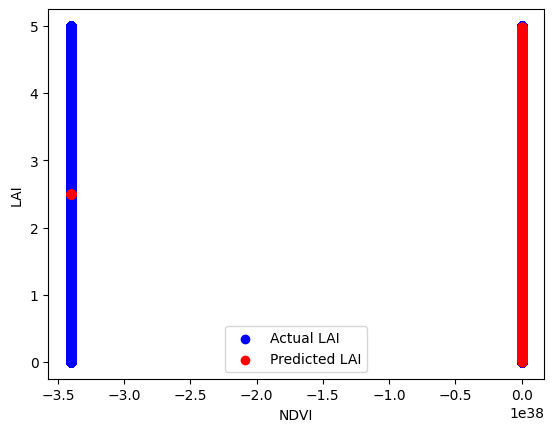

In [8]:
# Plot the predicted vs. actual LAI values
plt.scatter(X_test, y_test, color='blue', label='Actual LAI')
plt.scatter(X_test, y_pred, color='red', label='Predicted LAI')
plt.xlabel('NDVI')
plt.ylabel('LAI')
plt.legend()
plt.show()

In [ ]:
# Load LAI GeoTIFF file
lai_path = 'path/to/your/lai.tif'
with rasterio.open(lai_path) as lai_src:
    lai_array = lai_src.read(1)

# Flatten the arrays for machine learning
X = ndvi_array.flatten().reshape(-1, 1)
y = lai_array.flatten()

# Remove NaN values (if any) from the data
valid_mask = ~np.isnan(X) & ~np.isnan(y)
X = X[valid_mask].reshape(-1, 1)
y = y[valid_mask]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predicted vs. actual LAI values
plt.scatter(X_test, y_test, color='blue', label='Actual LAI')
plt.scatter(X_test, y_pred, color='red', label='Predicted LAI')
plt.xlabel('NDVI')
plt.ylabel('LAI')
plt.legend()
plt.show()